<a href="https://colab.research.google.com/github/JJay1010/K-software_-/blob/main/EunjuKang/project_05/230126_commit_Project05_Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project05. 당뇨 예측

개발 목표

당뇨병에 대한 EDA 및 당뇨 예측모델 설계 및 성능 향상

개발 내용

당뇨병에 영향을 미치는 요소를 EDA를 통해서 분석 및 시각화/ 
당뇨병 예측 모델을 구현

사용 기술

Python, Python Library(Pandas, Matplotlib, Seaborn), Machine Learning
Kubernetes


데이터 링크
https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset


## 가. 당뇨병에 대한 EDA

### 1. 데이터 분석 목적

당뇨병을 예측하는 것이 최종 목표이므로 당뇨병에 가장 큰 영향을 미치는 요인을 찾는 것이 필요하다. 기본지식으로 성별, 나이, 건강습관, 비만도가 영향을 미칠 것이라고 생각한다. 또한 첨부 논문에서 수면시간, medical checkup의 빈도도 영향을 미친다고 했다. 
따라서 설문조사의 질문이 당뇨병 예측을 하기에 적절했는지 알아보고 어떤 특징이 영향을 미치는 지 알아본다. 그리고 예측을 하기에 적절한 특징을 골라낸다. 




### 2. 데이터를 전체적으로 살펴보기

결측값, 이상치, 중복값 확인하고 채워넣기

In [2]:
# !pip install -U pandas-profiling

In [13]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import pandas_profiling
%matplotlib inline

In [2]:
# csv 파일 열기 - original_data

original_data = pd.read_csv('/content/drive/MyDrive/05_Diabetes/diabetes_binary_health_indicators_BRFSS2015.csv')

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/05_Diabetes/diabetes_binary_5050split_health_indicators_BRFSS2015.csv')

In [5]:
original_data.head()

Diabetes_binary  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0              0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1              0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2              0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3              0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4              0.0     1.0       1.0        1.0  24.0     0.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                   0.0           0.0     0.0  ...            1.0   
1                   0.0           1.0     0.0  ...            0.0   
2                   0.0           0.0     1.0  ...            1.0   
3                   0.0           1.0     1.0  ...            1.0   
4                   0.0           1.0     1.0  ...            1.0   

   NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  \
0          0.0      5.0      18.0      15.0       1.0  0.0   9.0        4.0   
1          1.0      3.0       0.0       0.0       0.0  0.0   7.0        6.0   
2          1.0      5.0      30.0      30.0       1.0  0.0   9.0        4.0   
3          0.0      2.0       0.0       0.0       0.0  0.0  11.0        3.0   
4          0.0      2.0       3.0       0.0       0.0  0.0  11.0        5.0   

   Income  
0     3.0  
1     1.0  
2     8.0  
3     6.0  
4     4.0  

[5 rows x 22 columns]

In [6]:
original_data.shape

(253680, 22)

In [7]:
original_data.columns

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

+ 결측값 확인

In [8]:
original_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [9]:
original_data.isnull().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

결측값은 없고 모두 float64이다. 

+ 고유값 확인

In [10]:
unique_values = {}
for col in original_data.columns:
    unique_values[col] = original_data[col].value_counts().shape[0]

pd.DataFrame(unique_values, index=['unique value count']).transpose()

unique value count
Diabetes_binary                        2
HighBP                                 2
HighChol                               2
CholCheck                              2
BMI                                   84
Smoker                                 2
Stroke                                 2
HeartDiseaseorAttack                   2
PhysActivity                           2
Fruits                                 2
Veggies                                2
HvyAlcoholConsump                      2
AnyHealthcare                          2
NoDocbcCost                            2
GenHlth                                5
MentHlth                              31
PhysHlth                              31
DiffWalk                               2
Sex                                    2
Age                                   13
Education                              6
Income                                 8

In [14]:
for col in original_data.columns:
  print(col)
  print(original_data[col].value_counts())
  print("_____________________________________________________________________________")

Diabetes_binary
0.0    218334
1.0     35346
Name: Diabetes_binary, dtype: int64
_____________________________________________________________________________
HighBP
0.0    144851
1.0    108829
Name: HighBP, dtype: int64
_____________________________________________________________________________
HighChol
0.0    146089
1.0    107591
Name: HighChol, dtype: int64
_____________________________________________________________________________
CholCheck
1.0    244210
0.0      9470
Name: CholCheck, dtype: int64
_____________________________________________________________________________
BMI
27.0    24606
26.0    20562
24.0    19550
25.0    17146
28.0    16545
        ...  
85.0        1
91.0        1
86.0        1
90.0        1
78.0        1
Name: BMI, Length: 84, dtype: int64
_____________________________________________________________________________
Smoker
0.0    141257
1.0    112423
Name: Smoker, dtype: int64
_____________________________________________________________________________


+ 중복값 확인

In [15]:
# Checking duplicates rows in dataset df1 to eliminate them

duplicates = original_data[original_data.duplicated()]
print("Duplicate Rows : ",len(duplicates))

Duplicate Rows :  24206


In [47]:
duplicates = data[original_data.duplicated()]
print("Duplicate Rows : ",len(duplicates))

Duplicate Rows :  3562


<ipython-input-47-517ee2e2d8ac>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  duplicates = data[original_data.duplicated()]


In [16]:
duplicates.head(10)

Diabetes_binary  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
1242              1.0     1.0       1.0        1.0  27.0     1.0     0.0   
1563              0.0     0.0       0.0        1.0  21.0     1.0     0.0   
2700              0.0     0.0       0.0        1.0  32.0     0.0     0.0   
3160              0.0     0.0       0.0        1.0  21.0     0.0     0.0   
3332              0.0     0.0       0.0        1.0  24.0     0.0     0.0   
3723              0.0     0.0       0.0        1.0  22.0     0.0     0.0   
4276              0.0     0.0       0.0        1.0  22.0     0.0     0.0   
4643              0.0     0.0       0.0        1.0  26.0     1.0     0.0   
4662              0.0     0.0       1.0        1.0  29.0     0.0     0.0   
4667              0.0     0.0       0.0        1.0  24.0     0.0     0.0   

      HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
1242                   0.0           0.0     0.0  ...            1.0   
1563                   0.0           1.0     1.0  ...            1.0   
2700                   0.0           1.0     1.0  ...            1.0   
3160                   0.0           1.0     1.0  ...            1.0   
3332                   0.0           1.0     1.0  ...            1.0   
3723                   0.0           1.0     1.0  ...            1.0   
4276                   0.0           1.0     0.0  ...            1.0   
4643                   0.0           1.0     1.0  ...            1.0   
4662                   0.0           1.0     1.0  ...            1.0   
4667                   0.0           1.0     1.0  ...            1.0   

      NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  \
1242          0.0      5.0       0.0      30.0       1.0  0.0  10.0   
1563          0.0      1.0       0.0       0.0       0.0  0.0   4.0   
2700          0.0      2.0       0.0       0.0       0.0  0.0   5.0   
3160          0.0      1.0       0.0       0.0       0.0  0.0   4.0   
3332          0.0      1.0       0.0       0.0       0.0  1.0   9.0   
3723          0.0      2.0       0.0       0.0       0.0  0.0   5.0   
4276          0.0      1.0       0.0       0.0       0.0  0.0   7.0   
4643          0.0      1.0       0.0       0.0       0.0  1.0   9.0   
4662          0.0      2.0       0.0       0.0       0.0  1.0   9.0   
4667          0.0      1.0       0.0       0.0       0.0  1.0   8.0   

      Education  Income  
1242        4.0     5.0  
1563        6.0     8.0  
2700        6.0     8.0  
3160        6.0     8.0  
3332        6.0     8.0  
3723        5.0     8.0  
4276        6.0     8.0  
4643        5.0     8.0  
4662        6.0     8.0  
4667        6.0     8.0  

[10 rows x 22 columns]

In [3]:
# 수정된 데이터 프레임: modified_data

modified_data = original_data.copy()

In [4]:
modified_data.drop_duplicates(inplace = True)

In [48]:
data.drop_duplicates(inplace = True)

In [5]:
modified_data.shape

(229474, 22)

In [6]:
modified_data.isnull().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [49]:
data.isnull().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

+ 이상치 확인

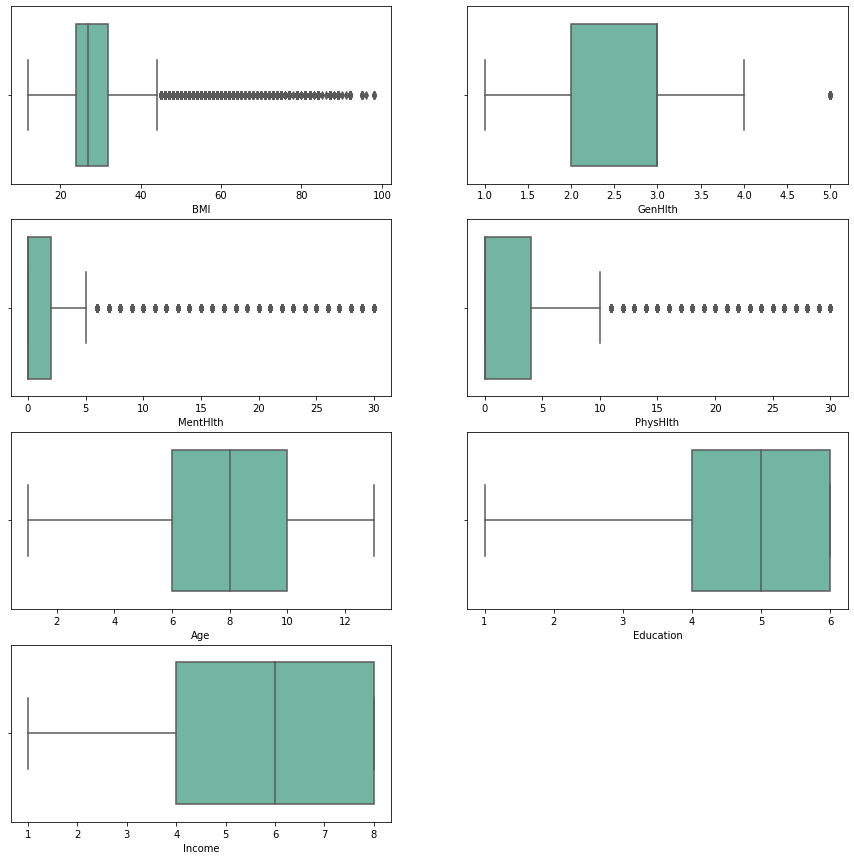

In [21]:
plt.figure(figsize = (15,15))
for i,col in enumerate(['BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age','Education', 'Income']):
    plt.subplot(4,2,i+1)
    sns.boxplot(x = col, data = modified_data ,palette='Set2')
plt.show()

각 columns 별 히스토그램 그리기

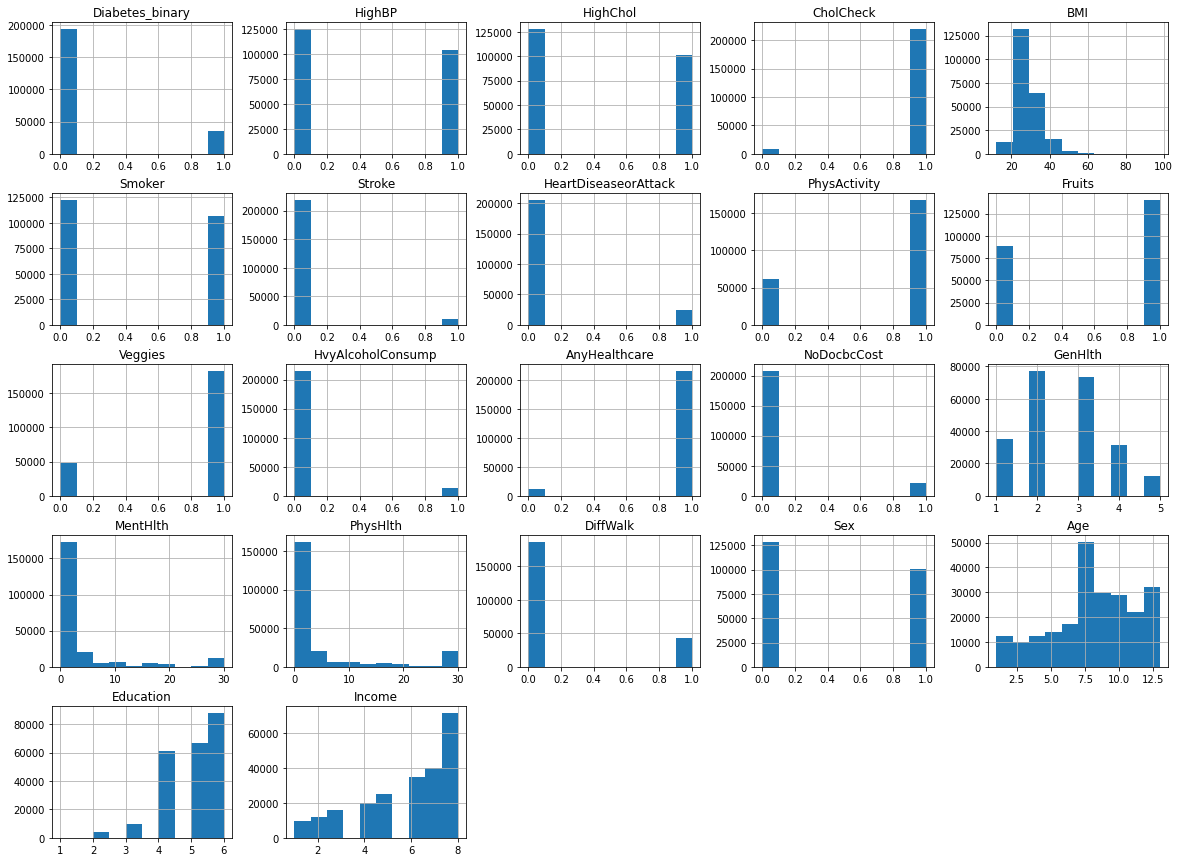

In [22]:
modified_data.hist(figsize=(20,15));

파이썬 pandas-profiling 라이브러리 활용해서 report 출력/ .html 로 저장

In [23]:
"""
pr = modified_data.profile_report() 
pr.to_file('/content/drive/MyDrive/05_Diabetes/pr_report.html')
"""

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [24]:
"""
pr
"""

### 3. EDA

당뇨병의 원인이 되는 것으로는 유전, 잘못된 식습관, 비만, 스트레스, 노화가 있으며 소득 상승은 식사 섭취량의 증가로 이어져 당뇨병 발생률을 증가시킨다. 
지속된 스트레스는 인슐린 작용을 방해하는 코티솔이라는 호르몬을 분비해 당뇨병의 발병 가능성을 높인다.

당뇨병의 합병증으로는 심근경색, 뇌졸증, 망막증, 신부전 등이 있다. 


 < 각 column 분석 >

Diabetes_binary : you have diabetes (0,1)

<단순 조사>

Sex : Indicate sex of respondent (0,1) (Female or Male)
- 성별
- 당뇨병과 성별은 큰 관련을 보이지 않을 것이라고 예상
- 고혈압, 고지혈증 등 심혈관 관련 지방과 남성이 관련을 보일 것이라고 예상

Age : Fourteen-level age category (1 ~ 14)
- 나이
- 나이가 많을수록 당뇨병 발생률이 높아짐 (이건 fact)

<심혈관계 질환>

HighBP 
- 고혈압: 당뇨의 원인이라기 보다는 당뇨병과 밀접한 관련이 있는 질병 
고혈압의 유발하는 요인에는 유전, 흡연, 고지혈증, 당뇨병, 나이, 남성과 폐경 이후 여성, 짜게 먹는 습관, 비만, 스트레스
- 당뇨병과 양의 상관관계를 보일 것이라고 추측할 수 있다.
- 흡연 여부와도 양의 상관관계 보일 수 있다
- 고혈압이 있을수록 당뇨병이 있을 확률이 높음


HighChol : Have you EVER been told by a doctor, nurse or other health professional that your blood cholesterol is high? (0,1) 
- 혈관 속 콜레스테롤 수치: : 당뇨의 원인이라기 보다는 당뇨병과 밀접한 관련이 있을 것
- 고지혈증 요인: 유전, 남성과 폐경 이후 여성, 잘못된 식습관, 비만


CholCheck : Cholesterol check within past five years (0,1)
- 직접적인 요인이라기 보다는 상관관계를 보일 수 있음

Stroke : (Ever told) you had a stroke. (0,1)

HeartDiseaseorAttack : Respondents that have ever reported having coronary heart disease (CHD) or myocardial infarction (MI) (0,1)

<생활 및 식습관>

BMI : Body Mass Index (BMI)
- 비만도
- 높을수록 건강에 악영향을 미치기 때문에 고혈압, 고지혈증, 당뇨병과 양의 상관관계를 보일 것이며 좋은 식습관과는 반대의 양상을 보일 것이다. 

Smoker : Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes] (0,1)
- 흡연 여부
- 흡연은 심혈관질환, 생활습관, 스트레스 등 복합적으로 볼 수 있는 요인이나 이 설문조사는 흡연에 관해 유의미한 질문이라고 생각하지 않음
- 당뇨병이나 심혈관 질환 등에 영향을 미칠려면 지속적으로 오랫동안 흡연을 해야하는데 질문은 단지 다섯갑을 물어보고 있을 뿐이므로 그렇게 높은 연관을 보이지 않을 것이라고 추측했다.
- 차라리 평균적으로 1주일에 흡연을 일정 이상 하는지 물어보는 질문이 더 적절할 것이다. 

PhysActivity : Adults who reported doing physical activity or exercise during the past 30 days other than their regular job (0,1)
- 일상생활말고 추가로 육체적 활동이나 운동을 했는지 여부 
- 이 질문에서 '30분'같은 구체적인 기준을 추가해서 설문했으면 더 좋았을듯 

Fruits : Consume Fruit 1 or more times per day (0,1)
Veggies : Consume Vegetables 1 or more times per day (0,1)
- 과일과 채소 섭취가 높을수록 건강한 식습관이라고 연결 가능하다

HvyAlcoholConsump : Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week)(0,1)
- 음주
- 알코올 섭취가 높을수록 심혈관질병이나 당뇨병 발생 확률이 높아질 것


<소득 관련>

AnyHealthcare : Do you have any kind of health care coverage, including health insurance, prepaid plans such as HMOs, or government plans such as Medicare, or Indian Health Service? (0,1)
- 의료 보험 소지 여부
- 의료 보험은 소득과도 연관이 있을 것이다.

NoDocbcCost : Was there a time in the past 12 months when you needed to see a doctor but could not because of cost? (0,1)
- 최근 1년간 병원을 가야하는데 돈이 없어서 못간 적이 있는지
- 소득과 관련

Education : What is the highest grade or year of school you completed? (1 ~ 6)
- 교육
- 소득과 관련이 있을 것이다.

Income : Is your annual household income from all sources: (If respondent refuses at any income level, code "Refused.") (1 ~ 8)
- 소득
- 소득이 높아질수록 식사량이 증가하는 경향이 있기 때문에 비만도와 소득은 관련있을 것


<스스로 생각하는 신체적, 정신적 건강 관련>

GenHlth : Would you say that in general your health is: rate (1 ~ 5)
- 스스로 생각하는 건강 척도

MentHlth : Now thinking about your mental health, which includes stress, depression, and problems with emotions, for how many days during the past 30 days was your mental health not good? (0 ~ 30)
- 지난 30일동안 정신적으로 힘들다고 생각한 날

PhysHlth : Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good? (0 ~ 30)
- 지난 30일동안 육체적으로 좋지 않다(아프거나 부상)고 생각한 날

DiffWalk : Do you have serious difficulty walking or climbing stairs? (0,1)
- 걷거나 계단을 오를때 힘듦을 느낀 경험


1. 설문조사가 당뇨병 예측에 유효한 것을 질문했다고 생각하는지? 
- 전체적인 설문조사 질문은 당뇨병과 관련된 것을 질문했다고 생각한다. 흡연에 관한 질문은 실제 흡연 습관을 반영하지 못한다고 생각하기에 수정하면 더 좋을 것 같다. 또한, 당뇨병에는 유전적 요인 또한 큰 원인이기에 가족력을 설문에 추가할 수 있을 것이다. 
유전이 주 원인이 되는 제1형 당뇨와 생활 습관이 주 원인이 되는 제2형 당뇨를 구분한다면 더 좋은 예측 모델을 만들 수 있을 것이다. 

2. 가설
(1) 각 columns 별 상관관계 추측
- 나이(Age): Diabetes_binary HighBP HighChol CholCheck Stroke HeartDiseaseorAttack 와 높은 관련을 보일 것
- 비만도(BMI): PhysActivity Fruits Veggies HvyAlcoholConsump Income과 높은 관련 
- 소득(Income): AnyHealthcare, NoDocbcCost Education 과 높은 관련
- GenHlth: Age, BMI와 음의 상관관계를 보일 것

(2) 당뇨병의 여부와 관련을 보일 것으로 추측되는 요인들
 - BMI, PhysActivity, MentHlth, Age : 당뇨병의 직접적인 원인이 되는 요인들
 - HighBP, HighChol, CholCheck Stroke, HeartDiseaseorAttack: 당뇨병을 원인으로 하거나 합병증으로 오는 요인들
 - 가장 밀접한 관련을 보일 것이라고 생각하는 요인들: 나이, 비만도

-> 시각화를 통해 확인해보자

+ columns 간 상관관계 확인

Seaborn의 Heatmap을 통해서 columns 간의 상관관계 파악가능

In [25]:
modified_data.corr()

Diabetes_binary    HighBP  HighChol  CholCheck  \
Diabetes_binary              1.000000  0.254318  0.194944   0.072523   
HighBP                       0.254318  1.000000  0.283963   0.111259   
HighChol                     0.194944  0.283963  1.000000   0.094772   
CholCheck                    0.072523  0.111259  0.094772   1.000000   
BMI                          0.205086  0.194218  0.089734   0.042487   
Smoker                       0.045504  0.074264  0.074583  -0.003721   
Stroke                       0.099193  0.124558  0.089375   0.027955   
HeartDiseaseorAttack         0.168213  0.201443  0.176446   0.050086   
PhysActivity                -0.100404 -0.104382 -0.063443  -0.004555   
Fruits                      -0.024805 -0.019467 -0.026257   0.017860   
Veggies                     -0.041734 -0.042994 -0.027399  -0.000653   
HvyAlcoholConsump           -0.065950 -0.014178 -0.019057  -0.020975   
AnyHealthcare                0.025331  0.052044  0.052363   0.115498   
NoDocbcCost                  0.020048  0.002292  0.003020  -0.054128   
GenHlth                      0.276940  0.272784  0.188139   0.062939   
MentHlth                     0.054153  0.037482  0.050346  -0.001430   
PhysHlth                     0.156211  0.144656  0.111008   0.040758   
DiffWalk                     0.205302  0.211759  0.136045   0.049107   
Sex                          0.032724  0.047119  0.022859  -0.024332   
Age                          0.177263  0.339802  0.263841   0.095942   
Education                   -0.102686 -0.112887 -0.050045  -0.009935   
Income                      -0.140659 -0.140030 -0.062089   0.001989   

                           BMI    Smoker    Stroke  HeartDiseaseorAttack  \
Diabetes_binary       0.205086  0.045504  0.099193              0.168213   
HighBP                0.194218  0.074264  0.124558              0.201443   
HighChol              0.089734  0.074583  0.089375              0.176446   
CholCheck             0.042487 -0.003721  0.027955              0.050086   
BMI                   1.000000 -0.009294  0.011006              0.039820   
Smoker               -0.009294  1.000000  0.054414              0.105169   
Stroke                0.011006  0.054414  1.000000              0.198814   
HeartDiseaseorAttack  0.039820  0.105169  0.198814              1.000000   
PhysActivity         -0.127780 -0.066869 -0.059306             -0.073094   
Fruits               -0.067424 -0.061731 -0.004486             -0.006946   
Veggies              -0.044054 -0.013744 -0.033029             -0.027180   
HvyAlcoholConsump    -0.058420  0.096048 -0.021347             -0.035561   
AnyHealthcare        -0.008519 -0.013963  0.013627              0.025987   
NoDocbcCost           0.045795  0.037335  0.028613              0.021971   
GenHlth               0.208351  0.134894  0.169809              0.246328   
MentHlth              0.068569  0.077641  0.061996              0.052601   
PhysHlth              0.102768  0.100447  0.140806              0.170335   
DiffWalk              0.182556  0.108144  0.169339              0.202657   
Sex                   0.030902  0.096650  0.003626              0.089828   
Age                  -0.049223  0.107695  0.128209              0.223912   
Education            -0.074433 -0.135657 -0.064178             -0.082288   
Income               -0.069097 -0.095314 -0.117108             -0.122728   

                      PhysActivity    Fruits  ...  AnyHealthcare  NoDocbcCost  \
Diabetes_binary          -0.100404 -0.024805  ...       0.025331     0.020048   
HighBP                   -0.104382 -0.019467  ...       0.052044     0.002292   
HighChol                 -0.063443 -0.026257  ...       0.052363     0.003020   
CholCheck                -0.004555  0.017860  ...       0.115498    -0.054128   
BMI                      -0.127780 -0.067424  ...      -0.008519     0.045795   
Smoker                   -0.066869 -0.061731  ...      -0.013963     0.037335   
Stroke                   -0.059306 -0.004486  ...

Text(0.5, 1.0, 'correlation of feature')

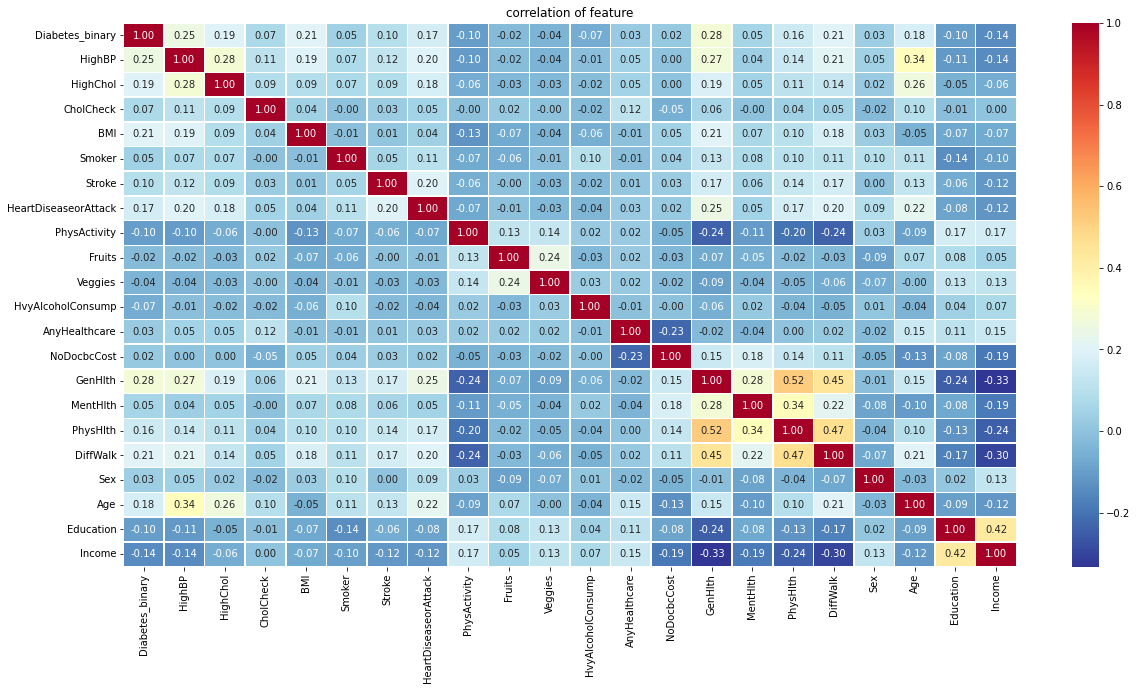

In [27]:
plt.figure(figsize = (20,10))
sns.heatmap(modified_data.corr(),annot=True , cmap = 'RdYlBu_r',fmt=".2f", linewidth=.5)
plt.title("correlation of feature")

(GenHlth ,PhysHlth ),(PhysHlth , DiffWalk),(GenHlth ,DiffWalk ) : 양의 상관관계가 높음 

(GenHlth ,Income ) , (DiffWalk , Income) : 음의 상관관계가 높음

가설) 각 columns 별 상관관계 추측
- 나이(Age): Diabetes_binary HighBP HighChol CholCheck Stroke HeartDiseaseorAttack 와 높은 관련을 보일 것 -> 대략 맞음

- 비만도(BMI): PhysActivity Fruits Veggies HvyAlcoholConsump Income과 높은 관련
 -> 고혈압, GenHlth와 0.2 이상의 관련을 보임

- 소득(Income): AnyHealthcare, NoDocbcCost Education 과 높은 관련
 -> AnyHealthcare, NoDocbcCost과는 큰 연관을 보이지 않았으며 GenHlth, PhysHlth, DiffWalk와 관련을 보였다. Education 과는 높은 양의 상관관계를 보였다. 

- GenHlth: Age, BMI와 음의 상관관계를 보일 것 -> 가장 다양한 요인들과 밀접한 관련을 보였다.

+ 예상과 다르게 당뇨병과 BMI, Income은 큰 연관을 보이지 않았다

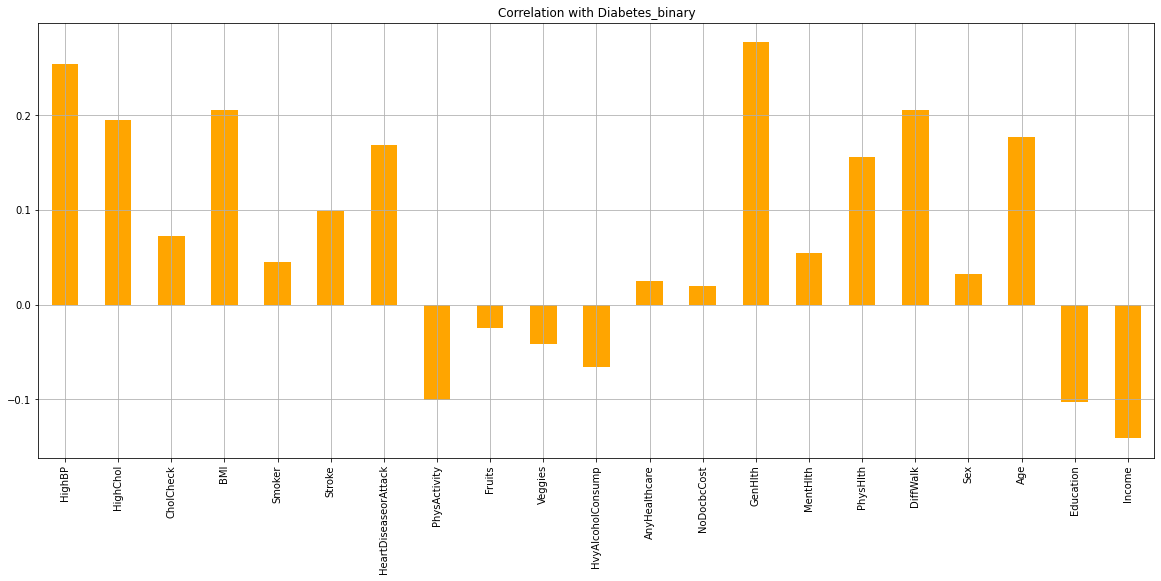

In [16]:
modified_data.drop('Diabetes_binary', axis=1).corrwith(modified_data.Diabetes_binary).plot(kind='bar', grid=True, figsize=(20, 8), title="Correlation with Diabetes_binary",color="Orange");

Smoker, Fruits, Veggies,AnyHealthcare, NoDocbcCost, MenHlth, Sex 는 당뇨병과 높은 관련을 보이지 않음 

In [29]:
modified_data.Diabetes_binary[modified_data['Diabetes_binary'] == 0] = 'No Diabetes'
modified_data.Diabetes_binary[modified_data['Diabetes_binary'] == 1] = 'Diabetes'

<ipython-input-29-bddb8c0b7ba5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  modified_data.Diabetes_binary[modified_data['Diabetes_binary'] == 1] = 'Diabetes'


In [50]:
data.Diabetes_binary[data['Diabetes_binary'] == 0] = 'No Diabetes'
data.Diabetes_binary[data['Diabetes_binary'] == 1] = 'Diabetes'

<ipython-input-50-5207f23e2053>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.Diabetes_binary[data['Diabetes_binary'] == 1] = 'Diabetes'


In [30]:
modified_data.head()

Diabetes_binary  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0     No Diabetes     1.0       1.0        1.0  40.0     1.0     0.0   
1     No Diabetes     0.0       0.0        0.0  25.0     1.0     0.0   
2     No Diabetes     1.0       1.0        1.0  28.0     0.0     0.0   
3     No Diabetes     1.0       0.0        1.0  27.0     0.0     0.0   
4     No Diabetes     1.0       1.0        1.0  24.0     0.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                   0.0           0.0     0.0  ...            1.0   
1                   0.0           1.0     0.0  ...            0.0   
2                   0.0           0.0     1.0  ...            1.0   
3                   0.0           1.0     1.0  ...            1.0   
4                   0.0           1.0     1.0  ...            1.0   

   NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  \
0          0.0      5.0      18.0      15.0       1.0  0.0   9.0        4.0   
1          1.0      3.0       0.0       0.0       0.0  0.0   7.0        6.0   
2          1.0      5.0      30.0      30.0       1.0  0.0   9.0        4.0   
3          0.0      2.0       0.0       0.0       0.0  0.0  11.0        3.0   
4          0.0      2.0       3.0       0.0       0.0  0.0  11.0        5.0   

   Income  
0     3.0  
1     1.0  
2     8.0  
3     6.0  
4     4.0  

[5 rows x 22 columns]

In [51]:
data.head()

Diabetes_binary  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0     No Diabetes     1.0       0.0        1.0  26.0     0.0     0.0   
1     No Diabetes     1.0       1.0        1.0  26.0     1.0     1.0   
2     No Diabetes     0.0       0.0        1.0  26.0     0.0     0.0   
3     No Diabetes     1.0       1.0        1.0  28.0     1.0     0.0   
4     No Diabetes     0.0       0.0        1.0  29.0     1.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                   0.0           1.0     0.0  ...            1.0   
1                   0.0           0.0     1.0  ...            1.0   
2                   0.0           1.0     1.0  ...            1.0   
3                   0.0           1.0     1.0  ...            1.0   
4                   0.0           1.0     1.0  ...            1.0   

   NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  \
0          0.0      3.0       5.0      30.0       0.0  1.0   4.0        6.0   
1          0.0      3.0       0.0       0.0       0.0  1.0  12.0        6.0   
2          0.0      1.0       0.0      10.0       0.0  1.0  13.0        6.0   
3          0.0      3.0       0.0       3.0       0.0  1.0  11.0        6.0   
4          0.0      2.0       0.0       0.0       0.0  0.0   8.0        5.0   

   Income  
0     8.0  
1     8.0  
2     8.0  
3     8.0  
4     8.0  

[5 rows x 22 columns]

In [31]:
cols = ['HighBP', 'HighChol', 'CholCheck','Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk']

In [32]:
def create_plot_pivot(data, x_column):
    """ Create a pivot table for satisfaction versus another rating for easy plotting. """
    _df_plot = data.groupby([x_column, 'Diabetes_binary']).size() \
    .reset_index().pivot(columns='Diabetes_binary', index=x_column, values=0)
    return _df_plot

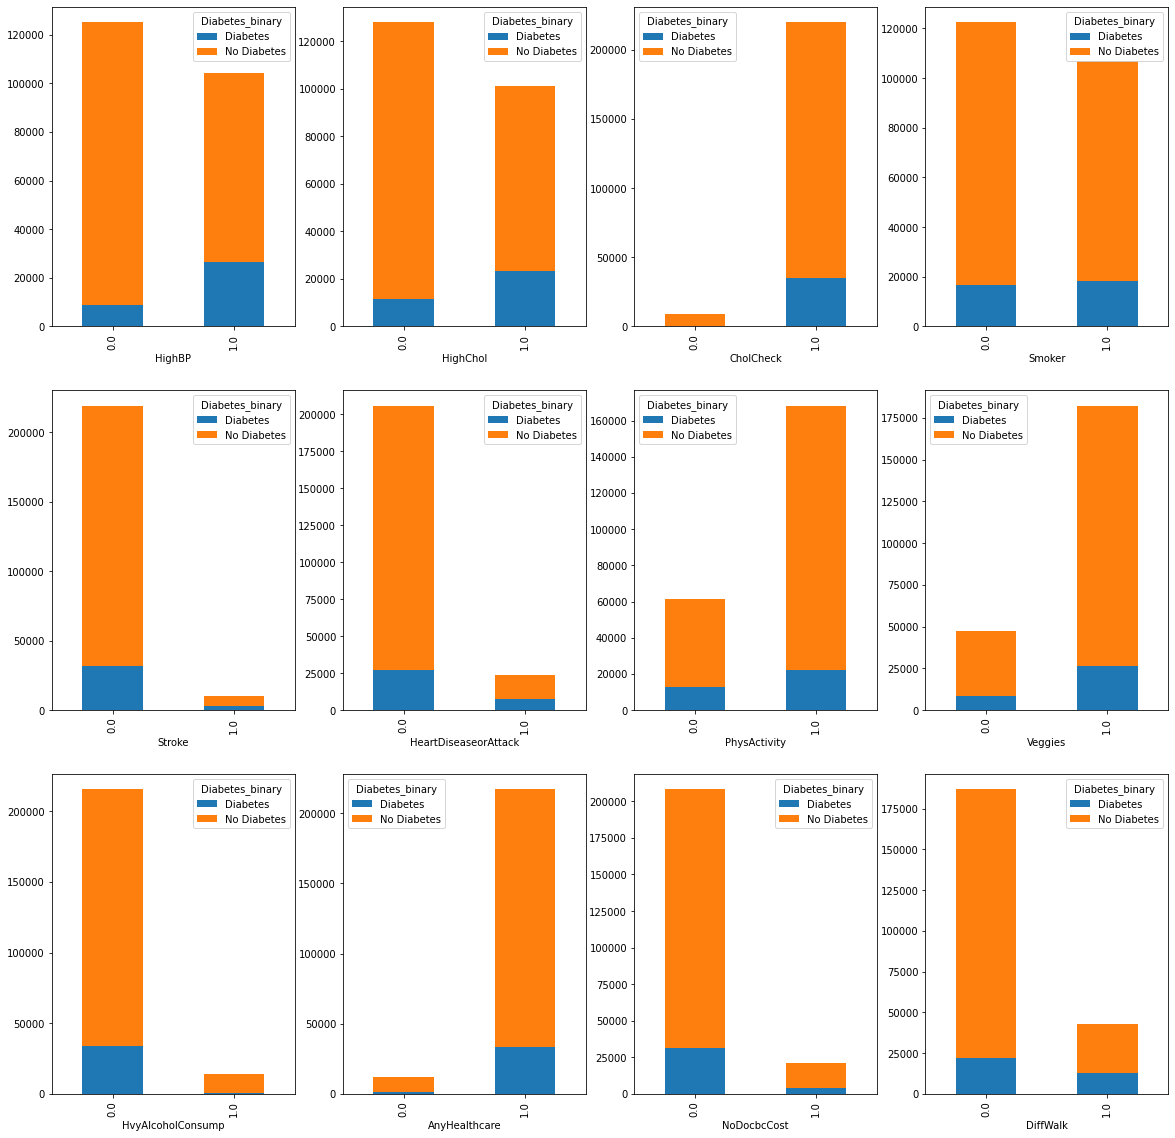

In [33]:
fig, ax = plt.subplots(3, 4, figsize=(20,20))
axe = ax.ravel()

c = len(cols)

for i in range(c):
    create_plot_pivot(modified_data, cols[i]).plot(kind='bar',stacked=True, ax=axe[i])
    axe[i].set_xlabel(cols[i])
    
fig.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


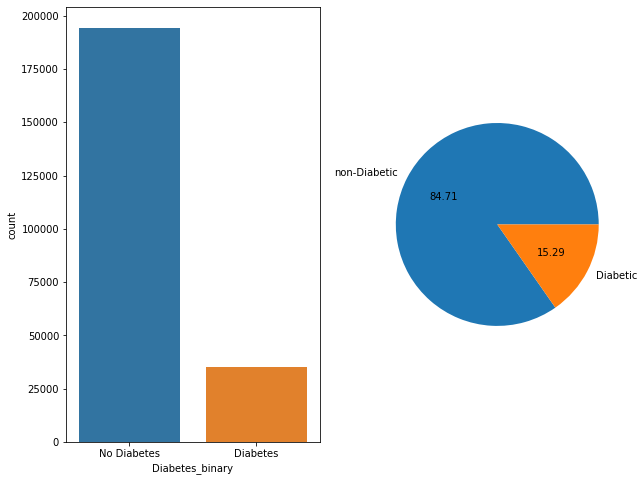

In [39]:

figure1, plot1 = plt.subplots(1,2,figsize=(10,8))

sns.countplot(modified_data['Diabetes_binary'],ax=plot1[0])


#checking diabetic and non diabetic pepoles average by pie 

labels=["non-Diabetic","Diabetic"]

plt.pie(modified_data["Diabetes_binary"].value_counts() , labels =labels ,autopct='%.02f' );

전체 인원에서 약 85%가 당뇨병이 없고 약 15%가 Diabetic 이거나 Prediabetic

당뇨병 유무가 50:50으로 구성된 data도 같이 시각화하여 각 요인별 당뇨병과의 연관관계를 더 확실하게 확인

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


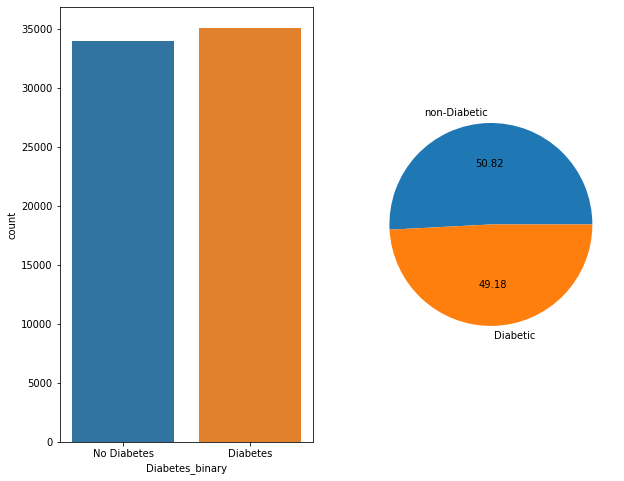

In [53]:

figure1, plot1 = plt.subplots(1,2,figsize=(10,8))

sns.countplot(data['Diabetes_binary'],ax=plot1[0])


#checking diabetic and non diabetic pepoles average by pie 

labels=["non-Diabetic","Diabetic"]

plt.pie(data["Diabetes_binary"].value_counts() , labels =labels ,autopct='%.02f' );

+ Age vs Diabetes

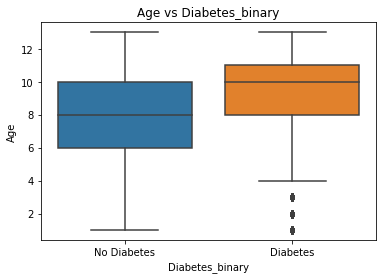

In [37]:
sns.boxplot(x = 'Diabetes_binary', y = 'Age', data = modified_data)
plt.title('Age vs Diabetes_binary')
plt.show()

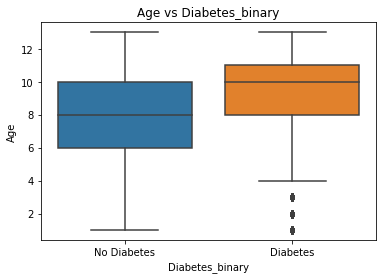

In [55]:
sns.boxplot(x = 'Diabetes_binary', y = 'Age', data = data)
plt.title('Age vs Diabetes_binary')
plt.show()

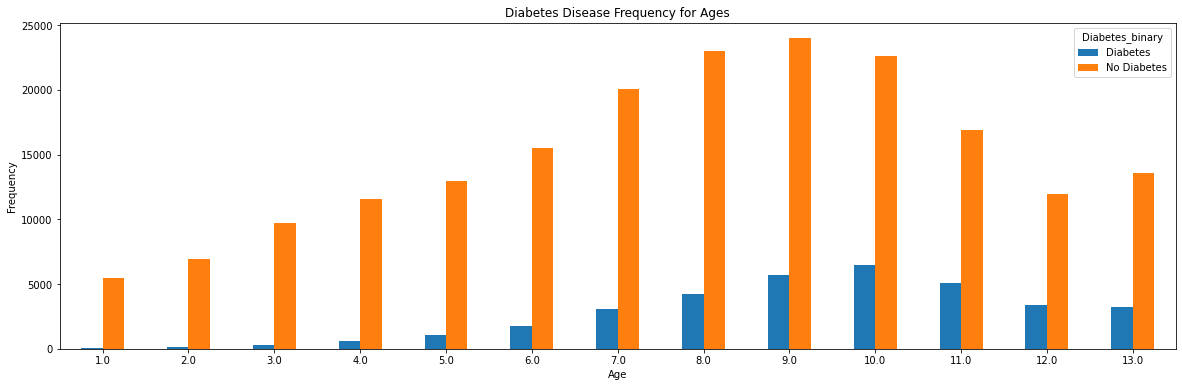

In [38]:
pd.crosstab(modified_data.Age,modified_data.Diabetes_binary).plot(kind="bar",figsize=(20,6))
plt.title('Diabetes Disease Frequency for Ages')
plt.xlabel('Age')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

예상과 같이 나이가 많을수록 당뇨병 발생률이 높아짐

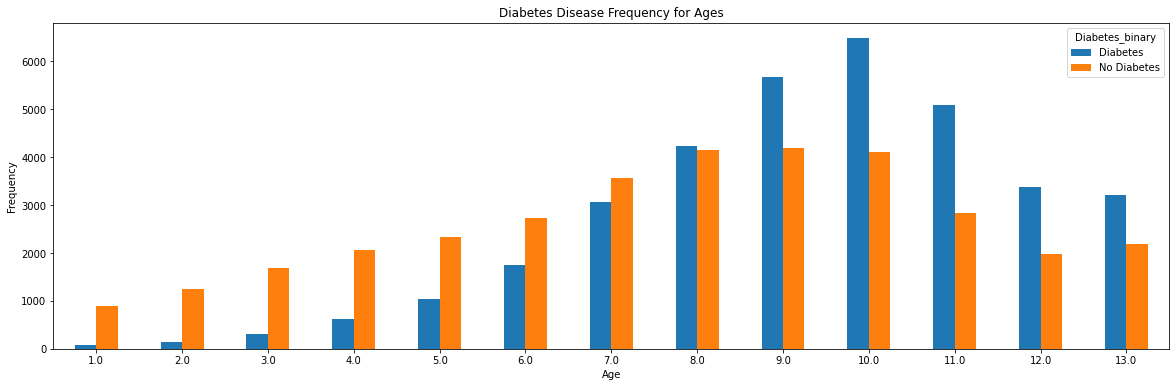

In [54]:
pd.crosstab(data.Age,data.Diabetes_binary).plot(kind="bar",figsize=(20,6))
plt.title('Diabetes Disease Frequency for Ages')
plt.xlabel('Age')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

+ Education vs Diabetes

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


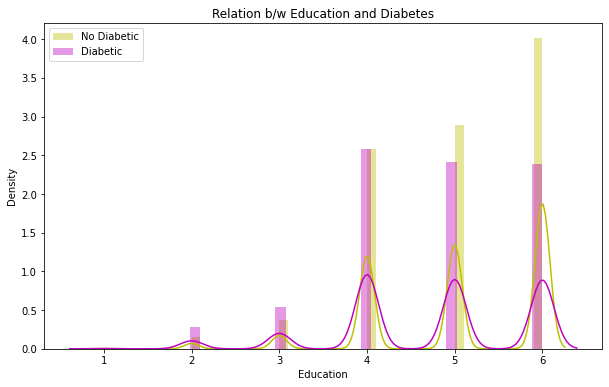

In [42]:
plt.figure(figsize=(10,6))

sns.distplot(modified_data.Education[modified_data.Diabetes_binary == 'No Diabetes'], color="y", label="No Diabetic" )
sns.distplot(modified_data.Education[modified_data.Diabetes_binary == 'Diabetes'], color="m", label="Diabetic" )
plt.title("Relation b/w Education and Diabetes")

plt.legend()

학력이 높을수록 당뇨병 확률이 낮아지는 모습을 보임
-> 원래는 소득이 높을수록 학력이 높고, 소득이 높을수록 당뇨병 발생확률이 높아 학력이 높을수록 당뇨병 확률이 높아지는 모습을 보일것이라고 생각했으나 이와 반대의 모습을 보임, 주어진 데이터에서는 소득과 당뇨병 사이의 밀접한 관련을 확인할 수 없었음

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


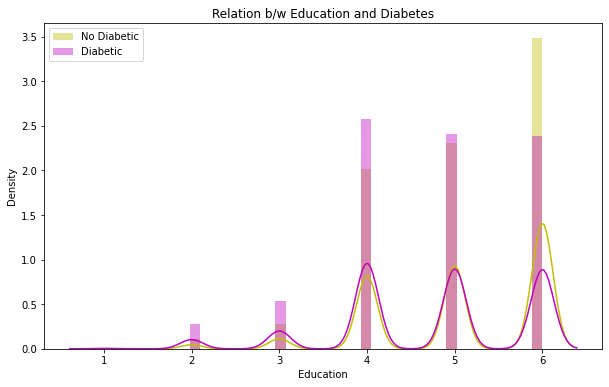

In [56]:
plt.figure(figsize=(10,6))

sns.distplot(data.Education[data.Diabetes_binary == 'No Diabetes'], color="y", label="No Diabetic" )
sns.distplot(data.Education[data.Diabetes_binary == 'Diabetes'], color="m", label="Diabetic" )
plt.title("Relation b/w Education and Diabetes")

plt.legend()

+ Income vs Diabetes

Text(0.5, 1.0, 'Relation b/w Income and Diabetes')

<Figure size 1440x720 with 0 Axes>

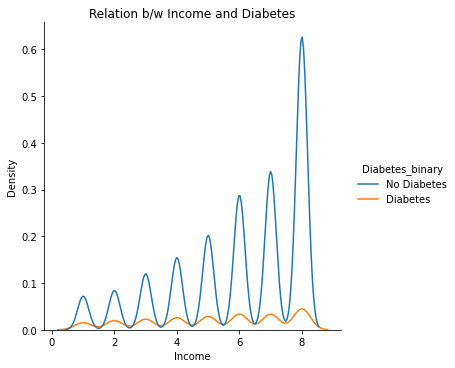

In [44]:
plt.figure(figsize=(20,10))

sns.displot(data=modified_data, x="Income", hue="Diabetes_binary", kind="kde")
plt.title("Relation b/w Income and Diabetes")

예상과 다르게 소득이 높을수록 당뇨병이 없는 사람의 수가 많아지는 모습을 보임

Text(0.5, 1.0, 'Relation b/w Income and Diabetes')

<Figure size 1440x720 with 0 Axes>

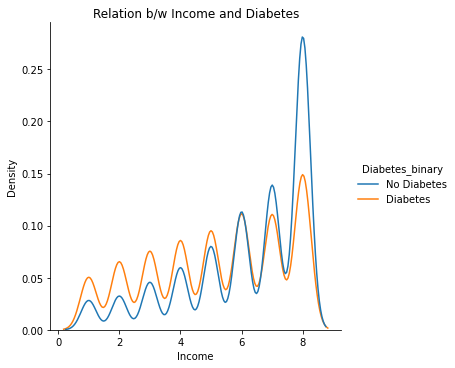

In [52]:
plt.figure(figsize=(20,10))

sns.displot(data=data, x="Income", hue="Diabetes_binary", kind="kde")
plt.title("Relation b/w Income and Diabetes")

+ BMI vs Diabetes

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


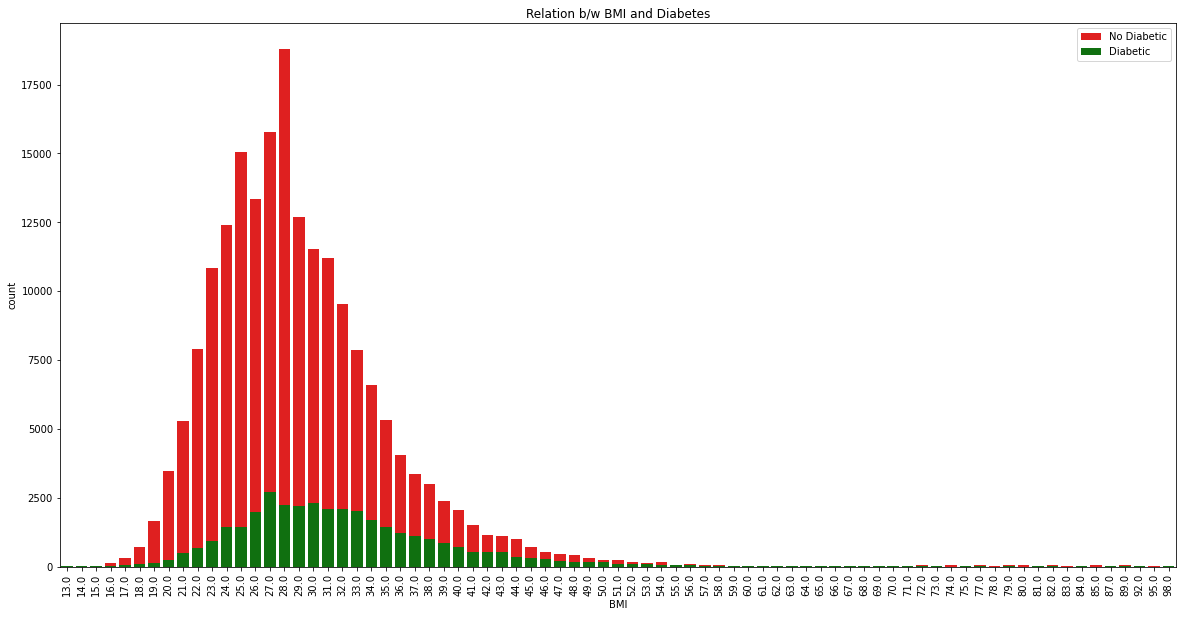

In [69]:
#count plot to see numbers of Diabetic and non Diabetic patient of Group two BMI 

plt.figure(figsize=(20,10))

sns.countplot(modified_data.BMI[modified_data.Diabetes_binary == 'No Diabetes'], color="r", label="No Diabetic")
sns.countplot(modified_data.BMI[modified_data.Diabetes_binary == 'Diabetes'], color="g", label="Diabetic")
plt.xticks(rotation=90)
plt.title("Relation b/w BMI and Diabetes")

plt.legend()

비만도가 높을수록 더 높은 당뇨병 발생률을 보임 

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


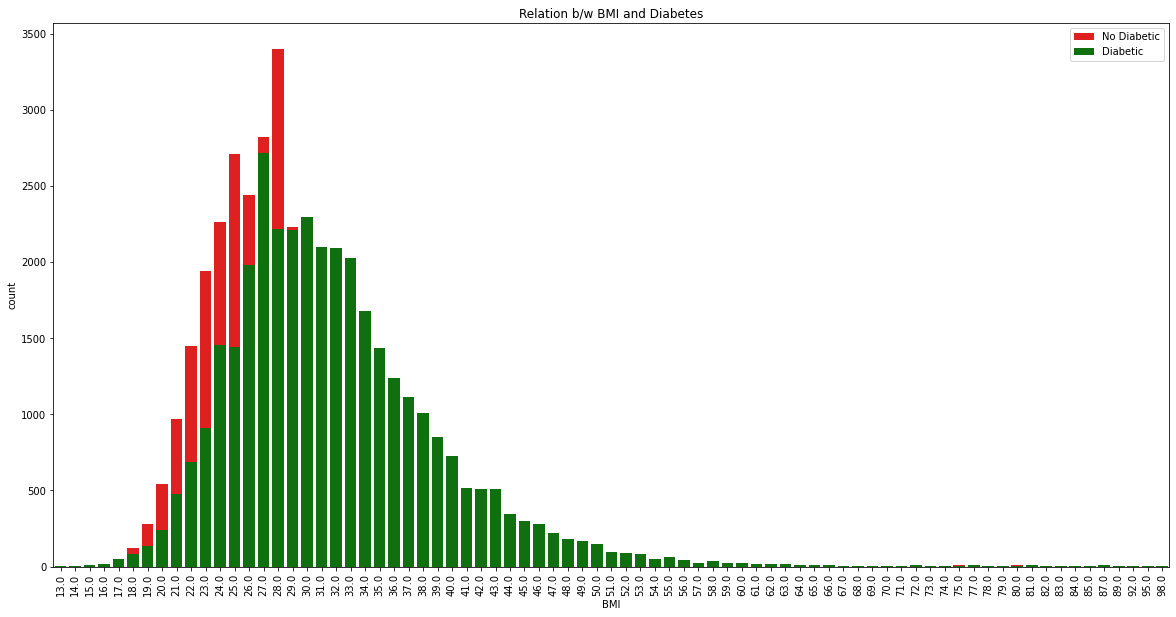

In [70]:
#count plot to see numbers of Diabetic and non Diabetic patient of Group two BMI 

plt.figure(figsize=(20,10))

sns.countplot(data.BMI[data.Diabetes_binary == 'No Diabetes'], color="r", label="No Diabetic")
sns.countplot(data.BMI[data.Diabetes_binary == 'Diabetes'], color="g", label="Diabetic")
plt.xticks(rotation=90)
plt.title("Relation b/w BMI and Diabetes")

plt.legend()

+ MentHlth vs Diabetes

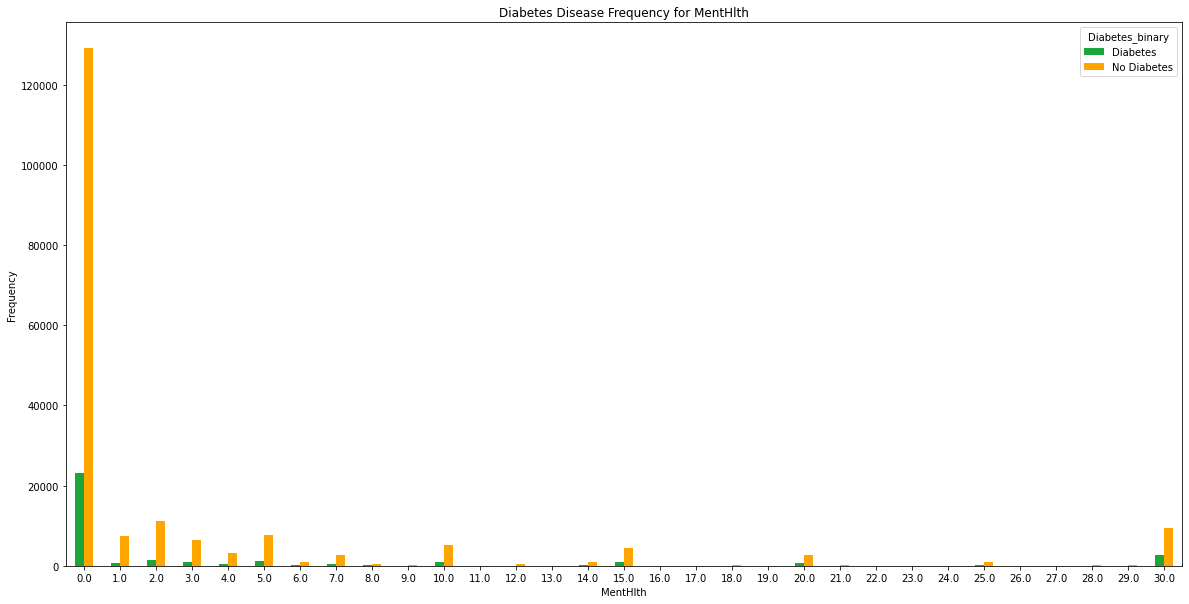

In [71]:
pd.crosstab(modified_data.MentHlth,modified_data.Diabetes_binary).plot(kind="bar",figsize=(20,10),color=['#1CA53B', '#FFA500' ])
plt.title('Diabetes Disease Frequency for MentHlth')
plt.xlabel('MentHlth')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

고르게 분포되어있지 않은걸로 봐서 0-5 (정신적으로 힘들다고 느낀) 정도가 당뇨병 발생에 영향을 미친다고 볼 수 있음 

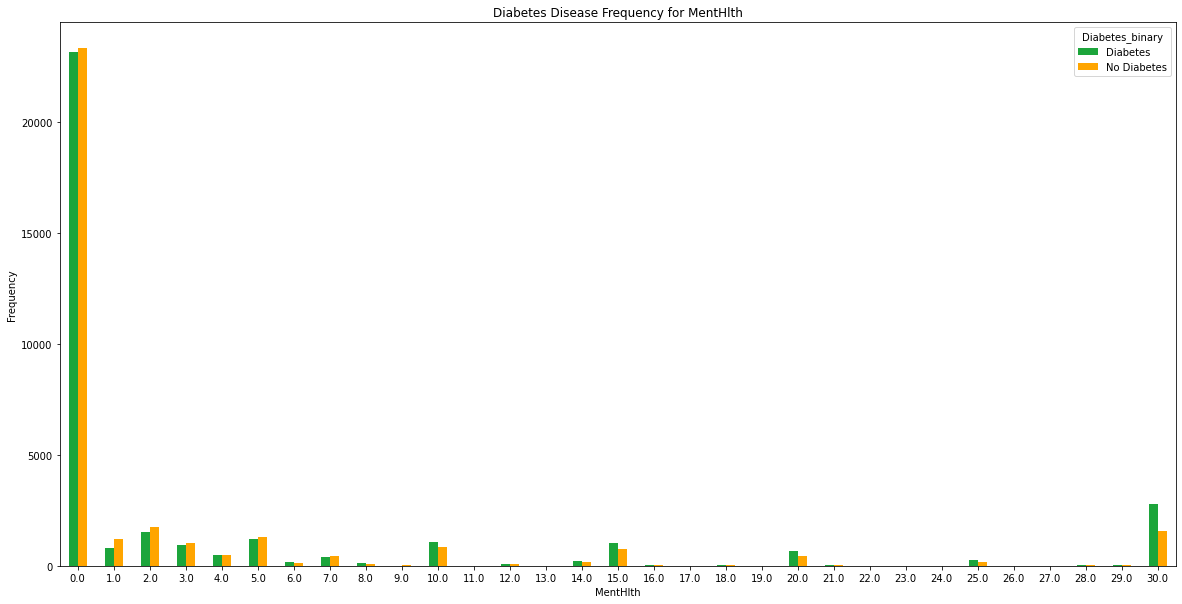

In [72]:
pd.crosstab(data.MentHlth,data.Diabetes_binary).plot(kind="bar",figsize=(20,10),color=['#1CA53B', '#FFA500' ])
plt.title('Diabetes Disease Frequency for MentHlth')
plt.xlabel('MentHlth')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

+ PhysHlth vs Diabetes

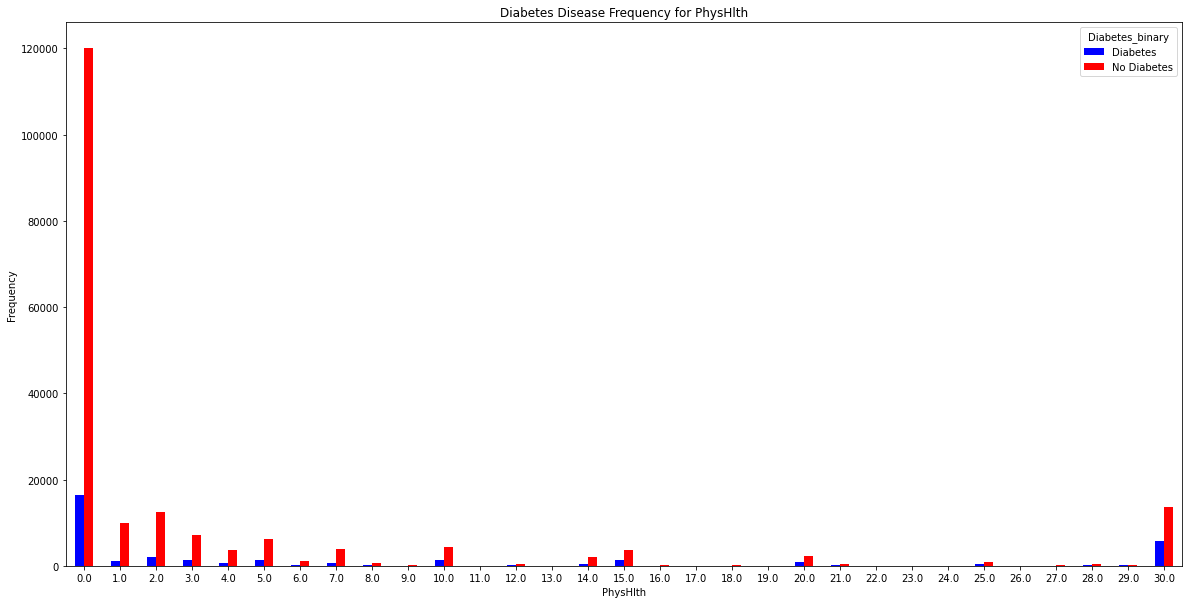

In [73]:
pd.crosstab(modified_data.PhysHlth,modified_data.Diabetes_binary).plot(kind="bar",figsize=(20,10),color=['Blue', 'Red' ])
plt.title('Diabetes Disease Frequency for PhysHlth')
plt.xlabel('PhysHlth')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

고르게 분포되어있지 않은걸로 봐서 0-5 (육체적으로 힘들다고 느낀) 정도가 당뇨병 발생에 영향을 미친다고 볼 수 있음 

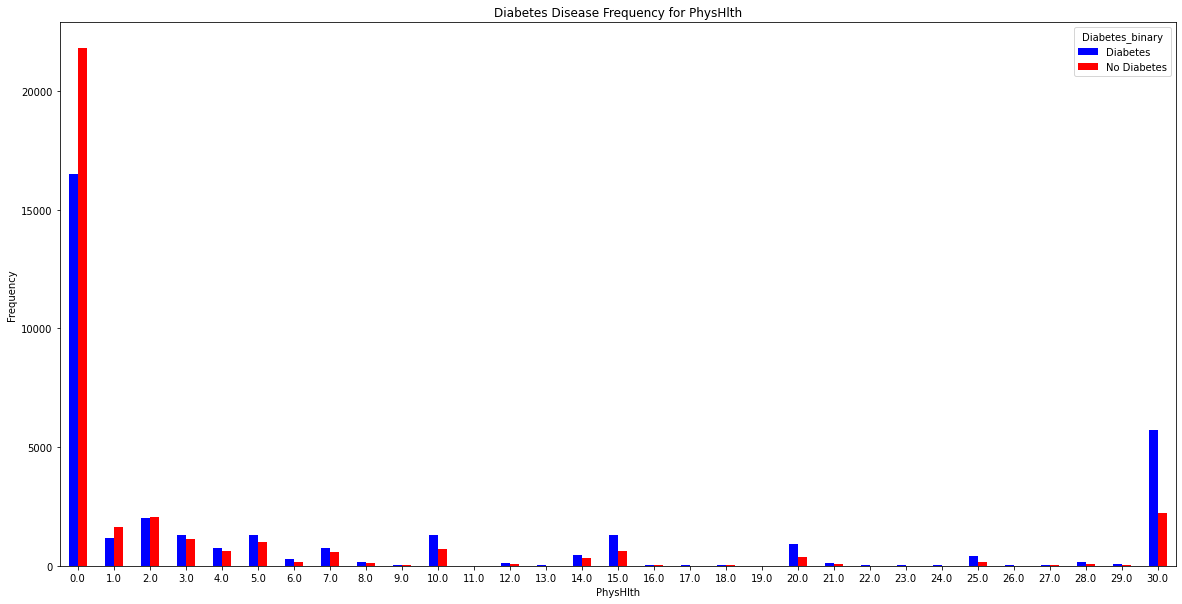

In [74]:
pd.crosstab(data.PhysHlth,data.Diabetes_binary).plot(kind="bar",figsize=(20,10),color=['Blue', 'Red' ])
plt.title('Diabetes Disease Frequency for PhysHlth')
plt.xlabel('PhysHlth')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

+ GenHlth vs Diabetes

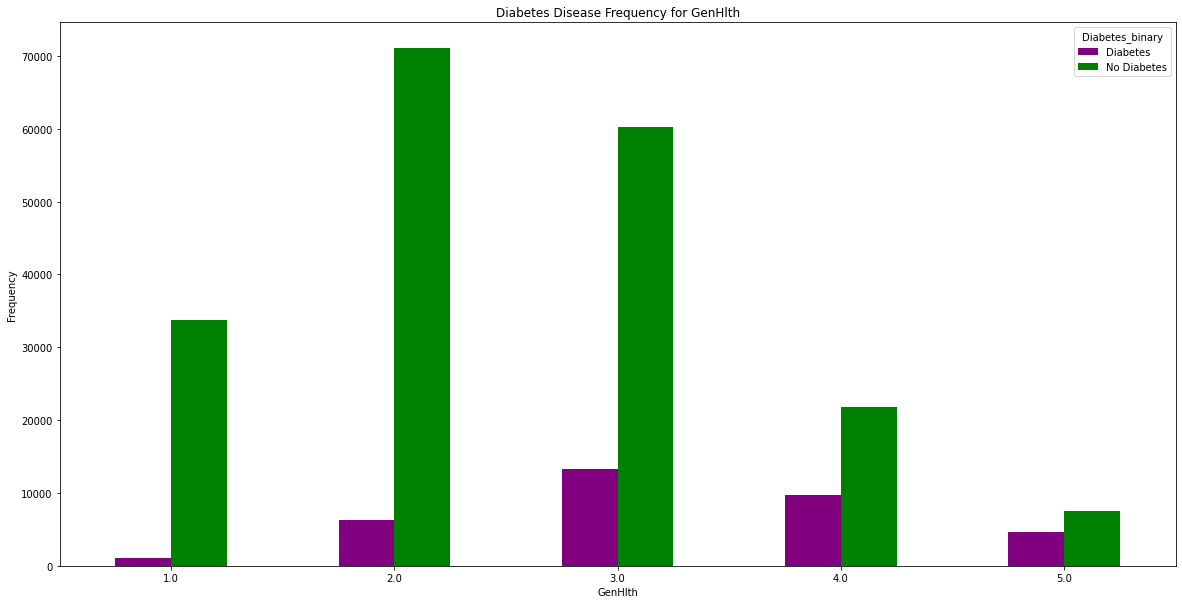

In [75]:
pd.crosstab(modified_data.GenHlth,modified_data.Diabetes_binary).plot(kind="bar",figsize=(20,10),color=['Purple', 'Green' ])
plt.title('Diabetes Disease Frequency for GenHlth')
plt.xlabel('GenHlth')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

중간값인 3.0에서 가장 높고 건강하다고 느껴도 당뇨병이 있는 것을 보면 큰 영향을 미치는 것 같아보이진 않음

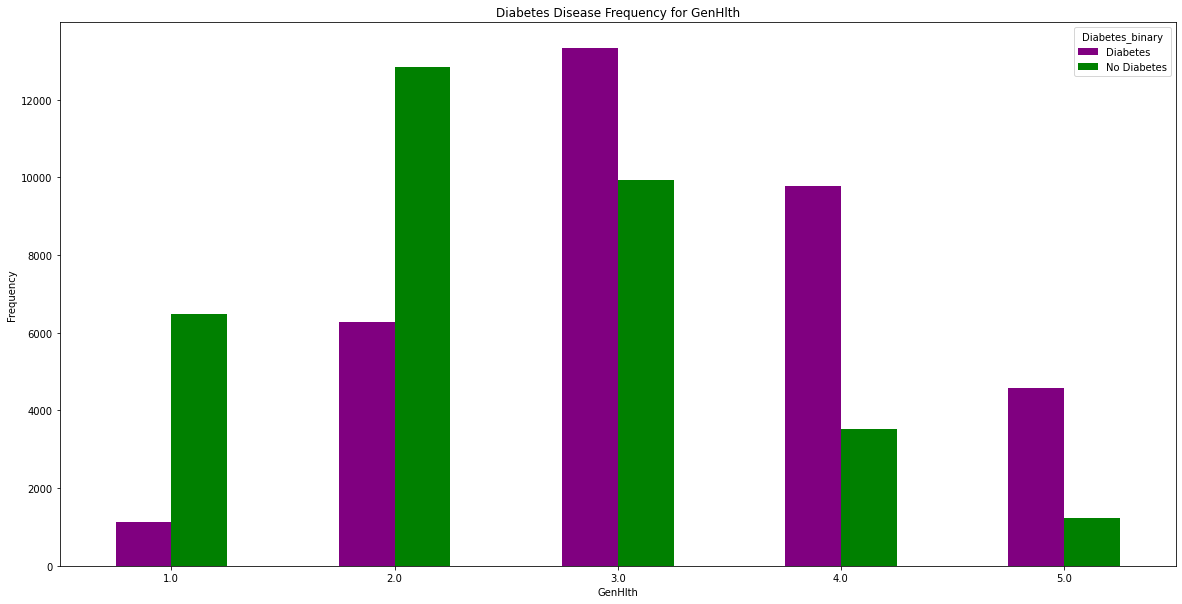

In [76]:
pd.crosstab(data.GenHlth,data.Diabetes_binary).plot(kind="bar",figsize=(20,10),color=['Purple', 'Green' ])
plt.title('Diabetes Disease Frequency for GenHlth')
plt.xlabel('GenHlth')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()